这个文档实现了集成学习(Ⅰ)：(sklearn.ensemble)
1. .AdaBoostClassifier(考察个体学习器，学习率和优化算法)
2. .AdaBoostRegressor(考察个体学习其，学习率和损失函数)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,ensemble,cross_validation

S:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
S:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_data_regression():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
                                            test_size=0.25,random_state=0)

In [3]:
def load_data_classification():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data,digits.target,
                                            test_size=0.25,random_state=0)

首先给出使用**AdaboostClassifier**的函数：

In [4]:
def test_AdaBoostClassifier(*data):
    X_train,X_test,y_train,y_test = data
    clf = ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    estimators_num = len(clf.estimators_)
    X = range(1,estimators_num+1)
    
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label = "Training score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label = "Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

调用该函数：

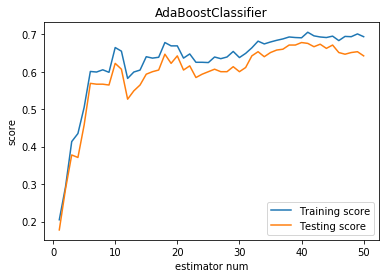

In [5]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostClassifier(X_train,X_test,y_train,y_test)

下面考察不同类型的个体分类器的影响： 

In [6]:
def test_AdaBoostClassifier_base_classifier(*data):
    from sklearn.naive_bayes import GaussianNB
    X_train,X_test,y_train,y_test = data
    fig = plt.figure()
    
    ###### 默认的个体分类器#####
    ax = fig.add_subplot(2,1,1)
    clf = ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    
    ### 绘图 
    estimators_num = len(clf.estimators_)
    X = range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label = "Training score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label = "Training score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Decision Tree")
    
    ###### Gaussian Naive Bayes 个体分类器 #####
    ax = fig.add_subplot(2,1,2)
    clf = ensemble.AdaBoostClassifier(learning_rate=0.1,base_estimator=GaussianNB())
    clf.fit(X_train,y_train)
    
    ### 绘图 
    estimators_num = len(clf.estimators_)
    X = range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label = "Training score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label = "Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    
    plt.show()

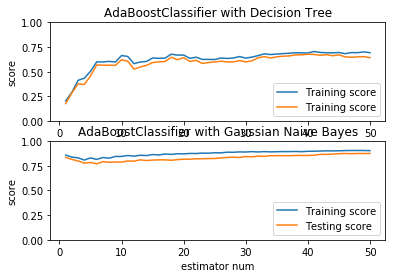

In [7]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostClassifier_base_classifier(X_train,X_test,y_train,y_test)

考察学习率的影响：

In [8]:
def test_AdaBoostClassifier_learning_rate(*data):
    X_train,X_test,y_train,y_test = data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    train_score = []
    test_score = []
    learning_rates = np.linspace(0.01,1)
    
    for learning_rate in learning_rates:
        clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500)
        clf.fit(X_train,y_train)
        train_score.append(clf.score(X_train,y_train))
        test_score.append(clf.score(X_test,y_test))
    
    ax.plot(learning_rates,train_score,label="Training score")
    ax.plot(learning_rates,test_score,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

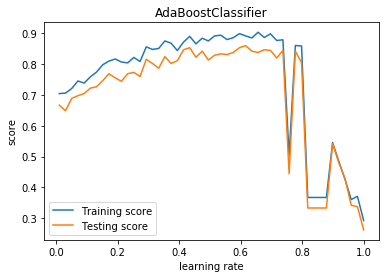

In [9]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostClassifier_learning_rate(X_train,X_test,y_train,y_test)

最后考察algorithm的影响：

In [10]:
def test_AdaBoostClassifier_algorithm(*data):
    X_train,X_test,y_train,y_test = data
    fig = plt.figure()
    
    algorithms = ['SAMME.R','SAMME']
    learning_rates = [0.05,0.1,0.5,0.9]
    
    for i,learning_rate in enumerate(learning_rates):
        ax = fig.add_subplot(2,2,i+1)
        for i,algorithm in enumerate(algorithms):
            clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate,algorithm=algorithm)
            clf.fit(X_train,y_train)
            ### 绘图
            estimators_num=len(clf.estimators_)
            X=range(1,estimators_num+1)
            ax.plot(list(X),list(clf.staged_score(X_train,y_train)),
                   label="%s:Training score" %algorithms[i])
            ax.plot(list(X),list(clf.staged_score(X_test,y_test)),
                   label="%s:Testing score" %algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_title("learning rate:%f" %learning_rate)
    fig.suptitle("AdaBoostClassifier")
    plt.show()

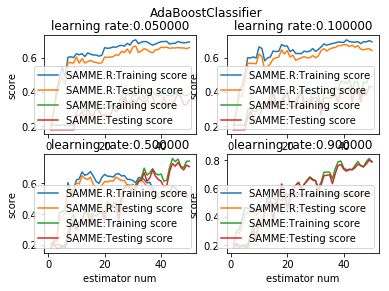

In [11]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test)

**AdaBoostRegressor**

In [12]:
def test_AdaBoostRegressor(*data):
    X_train,X_test,y_train,y_test = data
    regr = ensemble.AdaBoostRegressor()
    regr.fit(X_train,y_train)
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    estimators_num = len(regr.estimators_)
    X = range(1,estimators_num+1)
    
    ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label = "Training score")
    ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label = "Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()

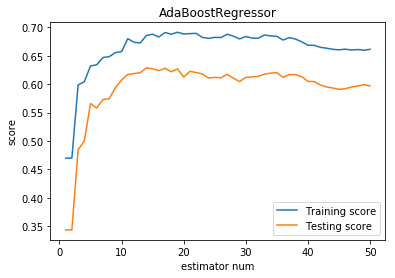

In [13]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostRegressor(X_train,X_test,y_train,y_test)

下面考察不同类型的个体分类器的影响:

In [18]:
def test_AdaBoostRegressor_base_regr(*data):
    from sklearn.svm import LinearSVR
    X_train,X_test,y_train,y_test = data
    regrs = [ensemble.AdaBoostRegressor(),
             ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=0.01,C=100))]
    labels=["Decision Tree Regressor","Linear SVM Regressor"]
    
    fig = plt.figure()
    
    for i,regr in enumerate(regrs):

        ax = fig.add_subplot(2,1,i+1)
        regr.fit(X_train,y_train)
        ### 绘图###
        estimators_num = len(regr.estimators_)
        X = range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label = "Training score")
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label = "Testing score")
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
        ax.set_title("Base_Estimator:%s" %labels[i])
    plt.suptitle("AdaBoostRegressor")
    plt.show()

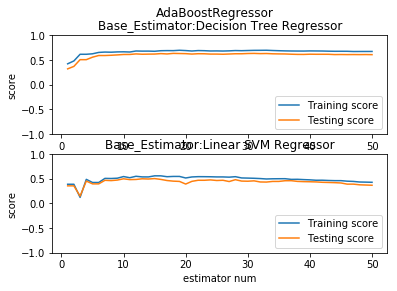

In [19]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostRegressor_base_regr(X_train,X_test,y_train,y_test)

考察学习率的影响：

In [20]:
def test_AdaBoostRegressor_learning_rate(*data):
    X_train,X_test,y_train,y_test = data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    train_score = []
    test_score = []
    learning_rates = np.linspace(0.01,1)
    
    for learning_rate in learning_rates:
        regr = ensemble.AdaBoostRegressor(learning_rate=learning_rate, n_estimators=500)
        regr.fit(X_train,y_train)
        train_score.append(regr.score(X_train,y_train))
        test_score.append(regr.score(X_test,y_test))
    
    ax.plot(learning_rates,train_score,label="Training score")
    ax.plot(learning_rates,test_score,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()

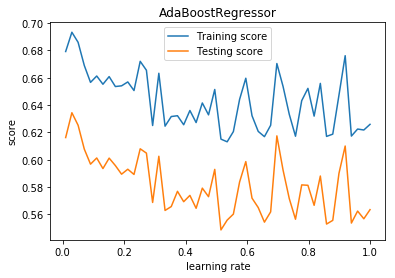

In [21]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostRegressor_learning_rate(X_train,X_test,y_train,y_test)

最后考察损失函数：

In [30]:
def test_AdaBoostRegressor_loss(*data):
    X_train,X_test,y_train,y_test = data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    losses = ['linear','square','exponential']
    
    for i,loss in enumerate(losses):
        regr = ensemble.AdaBoostRegressor(loss = loss, n_estimators=30)
        regr.fit(X_train,y_train)
        estimators_num = len(regr.estimators_)
        X = range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),
                label="Training score:loss=%s" %loss)
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),
                label="Testing score:loss=%s" %loss)
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
    plt.suptitle("AdaBoostRegressor")
    plt.show()

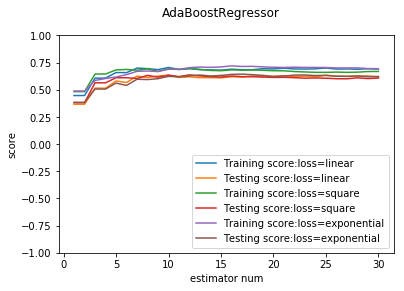

In [31]:
X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostRegressor_loss(X_train,X_test,y_train,y_test)